In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "data/clean_hockey_data.csv"
nhl_df = pd.read_csv(file)

In [47]:
def groupby_avg(df, category):
    temp_df = df.groupby([category])

    avg_goals = temp_df["G/60min"].mean()
    avg_assists = temp_df["A/60min"].mean()
    avg_pts = temp_df["PTS/60min"].mean()
    avg_hits = temp_df["HIT/60min"].mean()
    avg_blocks = temp_df["BLK/60min"].mean()
    avg_shootperc = temp_df["S_percent"].mean()
    count = temp_df["Player"].count()

    new_df = pd.DataFrame({
        "Avg G/60min" : avg_goals,
        "Avg A/60min" : avg_assists,
        "Avg PTS/60min" : avg_pts,
        "Avg HIT/60min" : avg_hits,
        "Avg BLK/60min" : avg_blocks,
        "Avg S_percent" : avg_shootperc,
        "Num Players" : count
    })
    return new_df

In [48]:
def groupby_median(df, category):
    temp_df = df.groupby([category])

    med_goals = temp_df["G/60min"].median()
    med_assists = temp_df["A/60min"].median()
    med_pts = temp_df["PTS/60min"].median()
    med_hits = temp_df["HIT/60min"].median()
    med_blocks = temp_df["BLK/60min"].median()
    med_shhotperc = temp_df["S_percent"].median()
    count = temp_df["Player"].count()


    new_df = pd.DataFrame({
        "Med G/60min" : avg_goals,
        "Med A/60min" : avg_assists,
        "Med PTS/60min" : avg_pts,
        "Med HIT/60min" : avg_hits,
        "Med BLK/60min" : avg_blocks,
        "Num Players" : count
    })
    return new_df

In [3]:
nhl_df.head()

,Unnamed: 0,Rk,Player,ID,Age,Pos,Tm,GP,G,A,...,FOL,FO_percent,HART,Votes,Season,G/60min,A/60min,PTS/60min,HIT/60min,BLK/60min
0,0,1,Connor McDavid,mcdavco01,20,C,EDM,82.0,30,70,...,458.0,43.2,1,1604,2017,1.038661,2.423543,3.462204,1.177149,1.004039
1,1,2,Sidney Crosby,crosbsi01,29,C,PIT,75.0,44,45,...,906.0,48.2,0,1104,2017,1.770624,1.810865,3.581489,3.219316,1.086519
2,2,3,Patrick Kane,kanepa01,28,RW,CHI,82.0,34,55,...,44.0,13.7,0,206,2017,1.163056,1.881414,3.044470,0.957811,0.513113
3,3,4,Nicklas Backstrom,backsni02,29,C,WSH,82.0,23,63,...,648.0,51.4,0,60,2017,0.921844,2.525050,3.446894,1.803607,1.322645
4,4,5,Nikita Kucherov,kucheni01,23,RW,TBL,74.0,40,45,...,0.0,0.0,0,119,2017,1.668985,1.877608,3.546592,1.251739,0.834492


In [4]:
for col in nhl_df.columns:
    print(col)

Unnamed: 0
Rk
Player
ID
Age
Pos
Tm
GP
G
A
PTS
plusminus
PIM
PS
EVG
PPG
SHG
GW
EVA
PPA
SHA
S
S_percent
TOI
ATOI
BLK
HIT
FOW
FOL
FO_percent
HART
Votes
Season
G/60min
A/60min
PTS/60min
HIT/60min
BLK/60min


In [26]:
forwards_data = nhl_df[(nhl_df["Pos"] != "D") & (nhl_df["Age"] >= 20)]
defensemen_data = nhl_df[(nhl_df["Pos"] == "D") & (nhl_df["Age"] >= 20)]

# Exlcuding 18/19 yr olds because of how few there are and their tendency to be superstars
young_df = forwards_data[(forwards_data["Age"] <= 22) & (forwards_data["Age"] >= 20)]

ssn18_df = forwards_data[forwards_data["Season"] == 2018]
ssn04_df = forwards_data[forwards_data["Season"] == 24]

In [27]:
temp_df = young_df.groupby(["Season"])

avg_goals = temp_df["G/60min"].mean()
avg_assists = temp_df["A/60min"].mean()
avg_pts = temp_df["PTS/60min"].mean()
avg_hits = temp_df["HIT/60min"].mean()
avg_blocks = temp_df["BLK/60min"].mean()
count = temp_df["Age"].count()
avg_shootperc = temp_df["S_percent"].mean()

young_by_season_df = pd.DataFrame({
    "Avg G/60min" : avg_goals,
    "Avg A/60min" : avg_assists,
    "Avg PTS/60min" : avg_pts,
    "Avg HIT/60min" : avg_hits,
    "Avg BLK/60min" : avg_blocks,
    "Avg S_percent" : avg_shootperc,
    "Num Players" : count
})

young_by_season_df.head()

,Avg G/60min,Avg A/60min,Avg PTS/60min,Avg HIT/60min,Avg BLK/60min,Avg S_percent,Num Players
Season,,,,,,,
2004,0.716873,0.925508,1.642380,0.000000,0.000000,9.880488,41
2006,0.819463,1.161118,1.980581,0.000000,0.000000,9.994828,58
2007,0.829930,1.094267,1.924196,0.000000,0.000000,10.268000,50
2008,0.865907,1.150347,2.016254,5.419241,1.550164,11.900000,50
2009,0.837911,1.122663,1.960574,2.993318,0.801755,10.957009,107


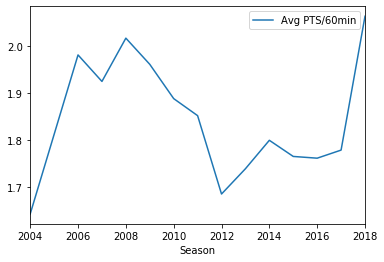

In [28]:
young_by_season_df.plot(kind="line", y = "Avg PTS/60min")

In [29]:
temp_df = forwards_data.groupby(["Age"])

avg_goals = temp_df["G/60min"].mean()
avg_assists = temp_df["A/60min"].mean()
avg_pts = temp_df["PTS/60min"].mean()
avg_hits = temp_df["HIT/60min"].mean()
avg_blocks = temp_df["BLK/60min"].mean()
count = temp_df["Age"].count()

age_group_df = pd.DataFrame({
    "Avg G/60min" : avg_goals,
    "Avg A/60min" : avg_assists,
    "Avg PTS/60min" : avg_pts,
    "Avg HIT/60min" : avg_hits,
    "Avg BLK/60min" : avg_blocks,
    "Num Players" : count
})

age_group_df.head(25)

,Avg G/60min,Avg A/60min,Avg PTS/60min,Avg HIT/60min,Avg BLK/60min,Num Players
Age,,,,,,
20,0.840733,1.127471,1.968204,3.260776,1.231604,166
21,0.777082,1.053516,1.830598,3.890954,1.260016,301
22,0.785635,1.040312,1.825947,4.229377,1.326418,374
23,0.757673,0.997122,1.754795,3.878317,1.287825,514
24,0.752985,0.954510,1.707494,4.645364,1.440101,528
25,0.745038,0.982753,1.727791,4.787185,1.436867,529
26,0.730524,0.964984,1.695508,4.722251,1.401468,521
27,0.722054,1.017377,1.739431,4.499503,1.337948,481
28,0.717384,1.010109,1.727493,4.177073,1.303606,472


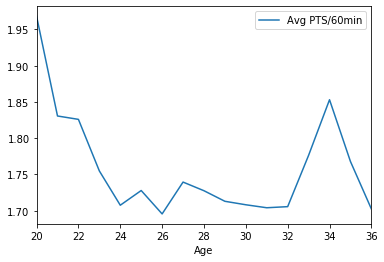

In [30]:
age_group_df.plot(kind="line", y = "Avg PTS/60min")


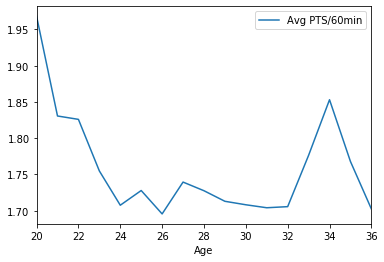

In [49]:
age_groupings_df = groupby_avg(forwards_data, "Age")
age_groupings_df.plot(kind="line", y = "Avg PTS/60min")

In [31]:
temp_df = defensemen_data.groupby(["Age"])

avg_goals = temp_df["G/60min"].mean()
avg_assists = temp_df["A/60min"].mean()
avg_pts = temp_df["PTS/60min"].mean()
avg_hits = temp_df["HIT/60min"].mean()
avg_blocks = temp_df["BLK/60min"].mean()
count = temp_df["Age"].count()

d_age_group_df = pd.DataFrame({
    "Avg G/60min" : avg_goals,
    "Avg A/60min" : avg_assists,
    "Avg PTS/60min" : avg_pts,
    "Avg HIT/60min" : avg_hits,
    "Avg BLK/60min" : avg_blocks,
    "Num Players" : count
})

d_age_group_df.head(25)

,Avg G/60min,Avg A/60min,Avg PTS/60min,Avg HIT/60min,Avg BLK/60min,Num Players
Age,,,,,,
20,0.224997,0.642685,0.867683,2.536200,2.578409,62
21,0.218103,0.706959,0.925062,2.815564,2.876368,125
22,0.206391,0.708246,0.914637,3.406178,3.109825,191
23,0.213710,0.704615,0.918326,3.237406,2.977277,272
24,0.201712,0.681077,0.882788,3.634415,3.487691,261
25,0.188975,0.679910,0.868885,3.469840,3.302907,286
26,0.204532,0.669864,0.874396,3.641745,3.362388,298
27,0.198934,0.669139,0.868073,3.607809,3.561097,275
28,0.203808,0.692406,0.896214,3.381900,3.135969,249


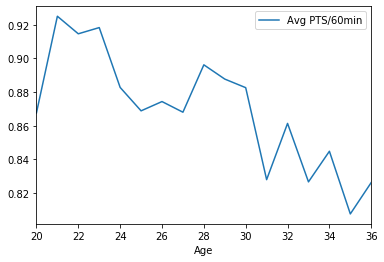

In [32]:
d_age_group_df.plot(kind="line", y = "Avg PTS/60min")

In [33]:
temp_df = forwards_data.groupby(["Age", "Season"])

avg_goals = temp_df["G/60min"].mean()
avg_assists = temp_df["A/60min"].mean()
avg_pts = temp_df["PTS/60min"].mean()
avg_hits = temp_df["HIT/60min"].mean()
avg_blocks = temp_df["BLK/60min"].mean()
count = temp_df["Age"].count()

age_group_df = pd.DataFrame({
    "Avg G/60min" : avg_goals,
    "Avg A/60min" : avg_assists,
    "Avg PTS/60min" : avg_pts,
    "Avg HIT/60min" : avg_hits,
    "Avg BLK/60min" : avg_blocks,
    "Num Players" : count
})

age_group_df.head(25)

Avg G/60min  Avg A/60min  Avg PTS/60min  Avg HIT/60min  \
Age Season                                                           
20  2004       0.710083     1.000822       1.710905       0.000000   
    2006       0.969825     1.220506       2.190331       0.000000   
    2007       1.136053     1.441294       2.577347       0.000000   
    2008       0.807087     1.282267       2.089355       4.021606   
    2009       0.870885     1.195815       2.066700       3.767359   
    2010       0.899800     1.105585       2.005386       3.585116   
    2011       0.884762     1.150141       2.034903       3.348614   
    2012       0.787953     0.968895       1.756848       4.333842   
    2013       0.716108     0.959380       1.675488       3.930470   
    2014       0.791017     0.966683       1.757700       5.408609   
    2015       0.686432     1.094831       1.781263       5.747016   
    2016       0.794921     1.104008       1.898929       3.414201   
    2017       0.811917     1.089265       1.901181       3.255384   
    2018       1.104138     1.371059       2.475197       3.168182   
21  2004       0.628754     0.764130       1.392884       0.000000   
    2006       0.820643     0.966650       1.787293       0.000000   
    2007       0.803853     1.109560       1.913413       0.000000   
    2008       0.771077     1.052324       1.823401       6.846588   
    2009       0.877868     1.143925       2.021793       2.872837   
    2010       0.724978     1.003993       1.728971       4.824210   
    2011       0.812687     1.058452       1.871139       4.830588   
    2012       0.664731     0.995876       1.660607       5.665691   
    2013       0.707039     1.017120       1.724159       5.365717   
    2014       0.783985     1.039861       1.823846       4.989238   
    2015       0.779479     1.069155       1.848635       6.305050   

            Avg BLK/60min  Num Players  
Age Season                              
20  2004         0.000000           13  
    2006         0.000000           12  
    2007         0.000000            4  
    2008         1.480588           12  
    2009         1.169460           19  
    2010         1.573517            9  
    2011         1.151165           10  
    2012         1.501521           12  
    2013         1.767673           11  
    2014         1.769540           11  
    2015         1.827784           11  
    2016         1.517629           13  
    2017         1.426469           17  
    2018         1.481148           12  
21  2004         0.000000           15  
    2006         0.000000           18  
    2007         0.000000           22  
    2008         1.615761           14  
    2009         0.655232           41  
    2010         1.500510           19  
    2011         1.682044           18  
    2012         1.778677           22  
    2013         1.672429           22  
    2014         1.882568           20  
    2015         1.807928           21

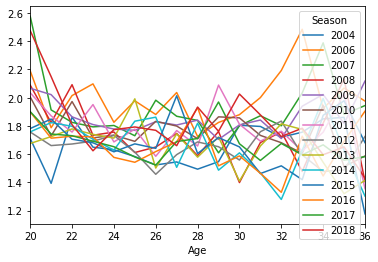

In [43]:
age_group_df.unstack("Season").plot(kind="line", y = "Avg PTS/60min")

In [44]:
temp_df = forwards_data.groupby(["Age", "Season"])

med_goals = temp_df["G/60min"].median()
med_assists = temp_df["A/60min"].median()
med_pts = temp_df["PTS/60min"].median()
med_hits = temp_df["HIT/60min"].median()
med_blocks = temp_df["BLK/60min"].median()
count = temp_df["Age"].count()

age_group_df = pd.DataFrame({
    "Med G/60min" : avg_goals,
    "Med A/60min" : avg_assists,
    "Med PTS/60min" : avg_pts,
    "Med HIT/60min" : avg_hits,
    "Med BLK/60min" : avg_blocks,
    "Num Players" : count
})

age_group_df.head(25)

Med G/60min  Med A/60min  Med PTS/60min  Med HIT/60min  \
Age Season                                                           
20  2004       0.710083     1.000822       1.710905       0.000000   
    2006       0.969825     1.220506       2.190331       0.000000   
    2007       1.136053     1.441294       2.577347       0.000000   
    2008       0.807087     1.282267       2.089355       4.021606   
    2009       0.870885     1.195815       2.066700       3.767359   
    2010       0.899800     1.105585       2.005386       3.585116   
    2011       0.884762     1.150141       2.034903       3.348614   
    2012       0.787953     0.968895       1.756848       4.333842   
    2013       0.716108     0.959380       1.675488       3.930470   
    2014       0.791017     0.966683       1.757700       5.408609   
    2015       0.686432     1.094831       1.781263       5.747016   
    2016       0.794921     1.104008       1.898929       3.414201   
    2017       0.811917     1.089265       1.901181       3.255384   
    2018       1.104138     1.371059       2.475197       3.168182   
21  2004       0.628754     0.764130       1.392884       0.000000   
    2006       0.820643     0.966650       1.787293       0.000000   
    2007       0.803853     1.109560       1.913413       0.000000   
    2008       0.771077     1.052324       1.823401       6.846588   
    2009       0.877868     1.143925       2.021793       2.872837   
    2010       0.724978     1.003993       1.728971       4.824210   
    2011       0.812687     1.058452       1.871139       4.830588   
    2012       0.664731     0.995876       1.660607       5.665691   
    2013       0.707039     1.017120       1.724159       5.365717   
    2014       0.783985     1.039861       1.823846       4.989238   
    2015       0.779479     1.069155       1.848635       6.305050   

            Med BLK/60min  Num Players  
Age Season                              
20  2004         0.000000           13  
    2006         0.000000           12  
    2007         0.000000            4  
    2008         1.480588           12  
    2009         1.169460           19  
    2010         1.573517            9  
    2011         1.151165           10  
    2012         1.501521           12  
    2013         1.767673           11  
    2014         1.769540           11  
    2015         1.827784           11  
    2016         1.517629           13  
    2017         1.426469           17  
    2018         1.481148           12  
21  2004         0.000000           15  
    2006         0.000000           18  
    2007         0.000000           22  
    2008         1.615761           14  
    2009         0.655232           41  
    2010         1.500510           19  
    2011         1.682044           18  
    2012         1.778677           22  
    2013         1.672429           22  
    2014         1.882568           20  
    2015         1.807928           21

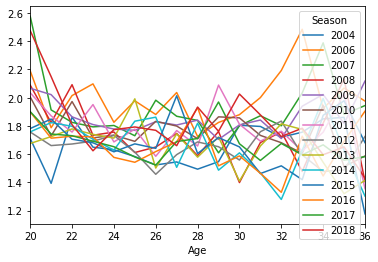

In [45]:
age_group_df.unstack("Season").plot(kind="line", y = "Med PTS/60min")